In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("IBM HR.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Stats EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
column_1 =df.pop("Attrition")

In [5]:
df.insert(0, 'Attrition',column_1)

In [6]:
#shiting target to begining of data set 
df.sample(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
363,Yes,33,Travel_Rarely,350,Sales,5,3,Marketing,1,485,...,2,80,0,1,2,3,1,0,0,0
1213,Yes,23,Travel_Rarely,427,Sales,7,3,Life Sciences,1,1702,...,2,80,1,3,2,3,3,2,0,2


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.describe(include='all')

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,2,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1233,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.923810,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,NaN,9.135373,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,NaN,18.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,30.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,NaN,36.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,NaN,43.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


<AxesSubplot:>

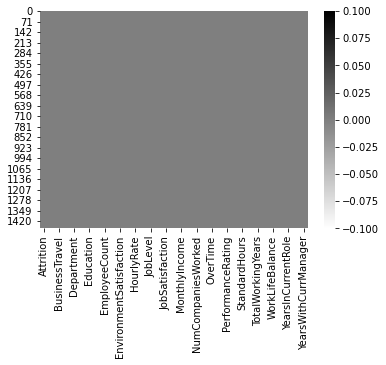

In [9]:
#checking missing values again 
sns.heatmap(df.isnull(),cmap="binary")

In [10]:
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df.keys()

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
df.sample(3)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1123,No,35,Travel_Rarely,670,Research & Development,10,4,Medical,1,1587,...,3,80,0,10,4,3,5,2,0,4
428,No,47,Travel_Rarely,983,Research & Development,2,2,Medical,1,574,...,3,80,3,20,2,3,5,0,0,4
1012,Yes,31,Travel_Frequently,667,Sales,1,4,Life Sciences,1,1427,...,2,80,0,1,3,3,1,0,0,0


In [13]:
val_ls=df.keys()

In [14]:
for i in val_ls:
    if df[i].nunique(dropna=False)==1:
        print ( df[i] )


0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64
0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object
0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64


In [15]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
df.shape

(1470, 35)

In [17]:
 df.nunique(dropna=False) 

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [18]:
for i in df:
    print ( i , df[i].unique() )

Attrition ['Yes' 'No']
Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

### EDA and data cleaning 

In [19]:
df.drop(df.columns[[8,9,17,21,26]], axis = 1, inplace = True)

In [20]:
 df.nunique(dropna=False) 

Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int

In [21]:
df.shape

(1470, 30)

In [22]:
column_list=[]
for i in df:
    column_list.append (i)
column_list

['Attrition',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [23]:
#encoding all the columns 
le=LabelEncoder()

for val in column_list:
    df[val]=le.fit_transform(df[val].astype(str))
    #astype describes that the data present are in str format
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,23,2,62,2,0,1,1,1,0,...,0,0,0,38,0,0,33,13,0,13
1,0,31,1,430,1,27,0,1,2,1,...,1,3,1,2,3,2,2,16,1,15
2,1,19,2,261,1,11,1,4,3,1,...,0,1,0,37,3,2,0,0,0,0
3,0,15,1,277,1,22,3,1,3,0,...,0,2,0,38,3,2,35,16,9,0
4,0,9,2,629,1,11,0,3,0,1,...,0,3,1,36,3,2,12,11,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,18,1,811,1,15,1,3,2,1,...,0,2,1,9,3,2,32,11,0,11
1466,0,21,2,644,1,25,0,3,3,1,...,0,0,1,39,5,2,34,16,1,15
1467,0,9,2,356,1,23,2,1,1,1,...,1,1,1,36,0,2,33,11,0,11
1468,0,31,1,11,2,11,2,3,3,1,...,0,3,0,9,3,1,36,15,0,16


In [24]:
#cheking the dtype 
df.dtypes

Attrition                   int32
Age                         int32
BusinessTravel              int32
DailyRate                   int32
Department                  int32
DistanceFromHome            int32
Education                   int32
EducationField              int32
EnvironmentSatisfaction     int32
Gender                      int32
HourlyRate                  int32
JobInvolvement              int32
JobLevel                    int32
JobRole                     int32
JobSatisfaction             int32
MonthlyIncome               int32
MonthlyRate                 int32
NumCompaniesWorked          int32
OverTime                    int32
PercentSalaryHike           int32
PerformanceRating           int32
RelationshipSatisfaction    int32
StockOptionLevel            int32
TotalWorkingYears           int32
TrainingTimesLastYear       int32
WorkLifeBalance             int32
YearsAtCompany              int32
YearsInCurrentRole          int32
YearsSinceLastPromotion     int32
YearsWithCurrM

Attrition                      AxesSubplot(0.125,0.657941;0.0596154x0.222059)
Age                         AxesSubplot(0.196538,0.657941;0.0596154x0.222059)
BusinessTravel              AxesSubplot(0.268077,0.657941;0.0596154x0.222059)
DailyRate                   AxesSubplot(0.339615,0.657941;0.0596154x0.222059)
Department                  AxesSubplot(0.411154,0.657941;0.0596154x0.222059)
DistanceFromHome            AxesSubplot(0.482692,0.657941;0.0596154x0.222059)
Education                   AxesSubplot(0.554231,0.657941;0.0596154x0.222059)
EducationField              AxesSubplot(0.625769,0.657941;0.0596154x0.222059)
EnvironmentSatisfaction     AxesSubplot(0.697308,0.657941;0.0596154x0.222059)
Gender                      AxesSubplot(0.768846,0.657941;0.0596154x0.222059)
HourlyRate                  AxesSubplot(0.840385,0.657941;0.0596154x0.222059)
JobInvolvement                 AxesSubplot(0.125,0.391471;0.0596154x0.222059)
JobLevel                    AxesSubplot(0.196538,0.391471;0.0596

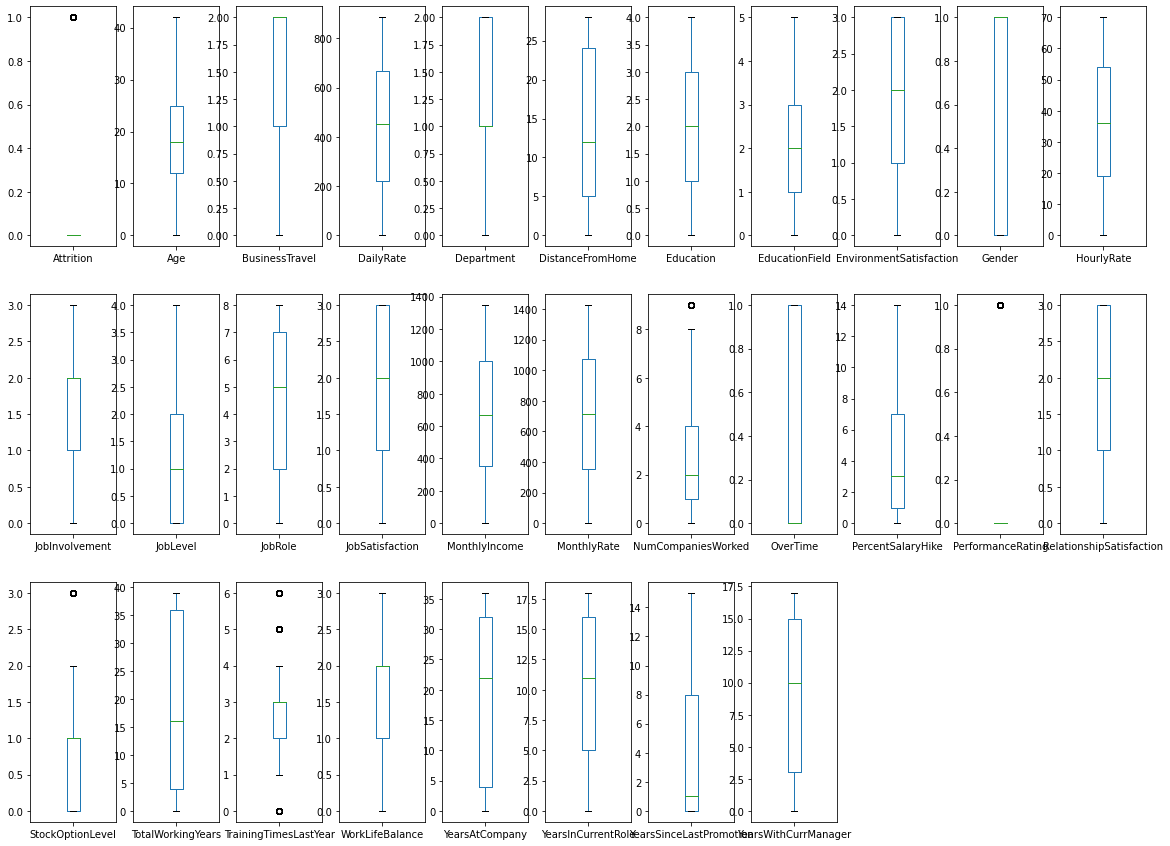

In [25]:
# to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(3,11) , figsize=(20,15))

In [26]:
df.skew()

Attrition                   1.844366
Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.015726
Department                  0.172231
DistanceFromHome           -0.070955
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.034403
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MonthlyIncome               0.009778
MonthlyRate                -0.004963
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.095256
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.166139
Y

<AxesSubplot:xlabel='NumCompaniesWorked'>

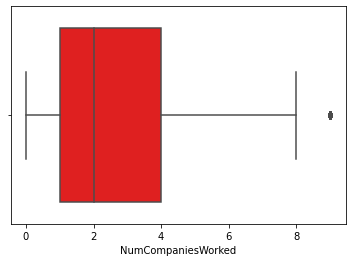

In [27]:
sns.boxplot(df["NumCompaniesWorked"],color="r")

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

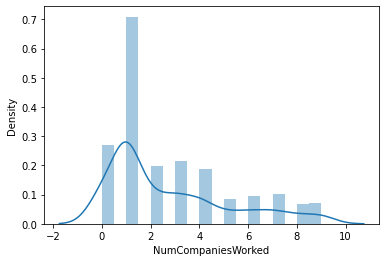

In [28]:
sns.distplot(df["NumCompaniesWorked"])

1.026471111968205


0.03130262038716518

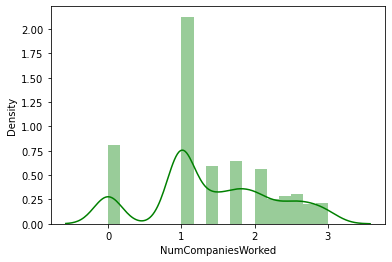

In [29]:
print(df["NumCompaniesWorked"].skew())
df["NumCompaniesWorked"]=np.sqrt(df["NumCompaniesWorked"])
sns.distplot(df["NumCompaniesWorked"],color="g")
df["NumCompaniesWorked"].skew()


<AxesSubplot:xlabel='TrainingTimesLastYear'>

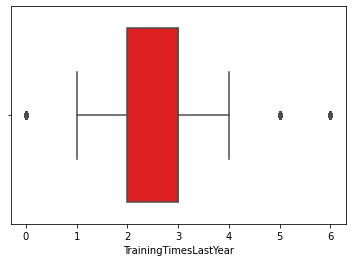

In [30]:

sns.boxplot(df["TrainingTimesLastYear"],color="r")

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Density'>

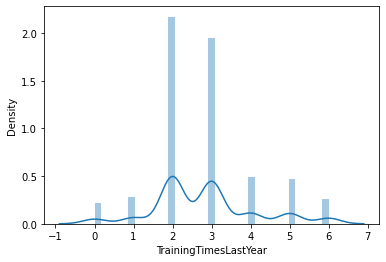

In [31]:
sns.distplot(df["TrainingTimesLastYear"])

0.5531241710537028


-1.2162682903701134

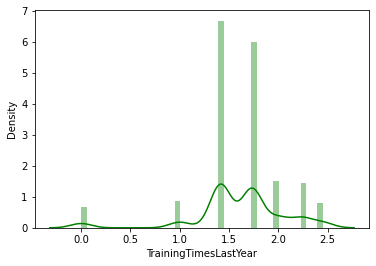

In [32]:
print(df["TrainingTimesLastYear"].skew())
df["TrainingTimesLastYear"]=np.sqrt(df["TrainingTimesLastYear"])
sns.distplot(df["TrainingTimesLastYear"],color="g")
df["TrainingTimesLastYear"].skew()


 # Treating this column will  increase the skewness so not running skewness treatment on it 

<AxesSubplot:xlabel='StockOptionLevel'>

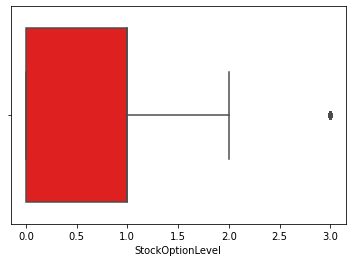

In [33]:

sns.boxplot(df["StockOptionLevel"],color="r")

0.9689803167738937


0.05752806182417695

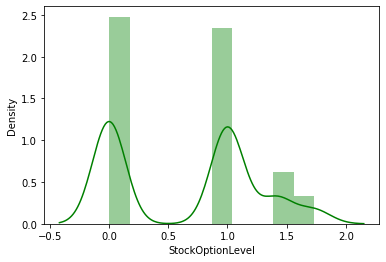

In [34]:
print(df["StockOptionLevel"].skew())
df["StockOptionLevel"]=np.sqrt(df["StockOptionLevel"])
sns.distplot(df["StockOptionLevel"],color="g")
df["StockOptionLevel"].skew()


In [35]:
#identifying outliers 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.28090588, 0.4463504 , 0.59004834, ..., 0.47526719, 0.77685523,
        0.659274  ],
       [0.4384223 , 1.32236521, 0.91319439, ..., 0.97536939, 0.56537797,
        1.00533106],
       [2.28090588, 0.008343  , 0.59004834, ..., 1.69184233, 0.77685523,
        1.59009686],
       ...,
       [0.4384223 , 1.08667552, 0.59004834, ..., 0.14186573, 0.77685523,
        0.31321695],
       [0.4384223 , 1.32236521, 0.91319439, ..., 0.80866866, 0.77685523,
        1.17835959],
       [0.4384223 , 0.32016256, 0.59004834, ..., 0.30856646, 0.56537797,
        0.14018842]])

In [36]:
#keeping the raw data and creating a new dataframe
df=df[(z<3).all(axis=1)]

In [37]:
df.shape

(1416, 30)

In [38]:
cor=df.corr()
round(cor,2) 


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.00,-0.16,0.00,0.03,0.07,0.00,-0.03,0.02,-0.11,0.04,...,-0.00,-0.05,-0.17,-0.03,-0.03,-0.05,-0.12,-0.13,-0.03,-0.15
Age,-0.16,1.00,0.03,-0.04,-0.03,0.00,0.21,-0.04,0.01,-0.04,...,0.00,0.06,0.06,-0.06,-0.02,-0.01,0.05,0.07,0.12,0.07
BusinessTravel,0.00,0.03,1.00,0.00,-0.00,0.01,-0.01,0.02,0.01,-0.02,...,-0.02,-0.04,-0.01,0.03,0.01,-0.01,0.00,-0.03,-0.03,-0.01
DailyRate,0.03,-0.04,0.00,1.00,0.01,0.00,-0.01,0.03,0.01,0.05,...,0.02,0.04,-0.01,-0.01,0.01,0.01,-0.01,0.03,0.02,0.01
Department,0.07,-0.03,-0.00,0.01,1.00,0.02,0.01,0.02,-0.03,-0.04,...,-0.02,-0.03,-0.01,-0.02,0.03,0.03,-0.03,0.03,0.03,-0.01
DistanceFromHome,0.00,0.00,0.01,0.00,0.02,1.00,-0.04,0.01,-0.03,0.03,...,0.01,0.01,-0.04,0.01,0.04,0.00,-0.00,0.00,0.01,0.00
Education,-0.03,0.21,-0.01,-0.01,0.01,-0.04,1.00,-0.05,-0.03,-0.02,...,-0.02,-0.00,0.02,-0.05,-0.02,0.02,0.00,0.01,0.03,0.02
EducationField,0.02,-0.04,0.02,0.03,0.02,0.01,-0.05,1.00,0.05,0.00,...,-0.01,-0.00,-0.02,0.05,0.05,0.05,0.06,0.02,0.01,0.04
EnvironmentSatisfaction,-0.11,0.01,0.01,0.01,-0.03,-0.03,-0.03,0.05,1.00,0.00,...,-0.02,0.01,0.01,0.01,-0.00,0.03,0.04,0.01,0.02,0.02
Gender,0.04,-0.04,-0.02,0.05,-0.04,0.03,-0.02,0.00,0.00,1.00,...,-0.02,0.03,0.00,0.02,-0.04,-0.00,-0.03,-0.00,-0.03,0.01


In [39]:
df.shape

(1416, 30)

<AxesSubplot:>

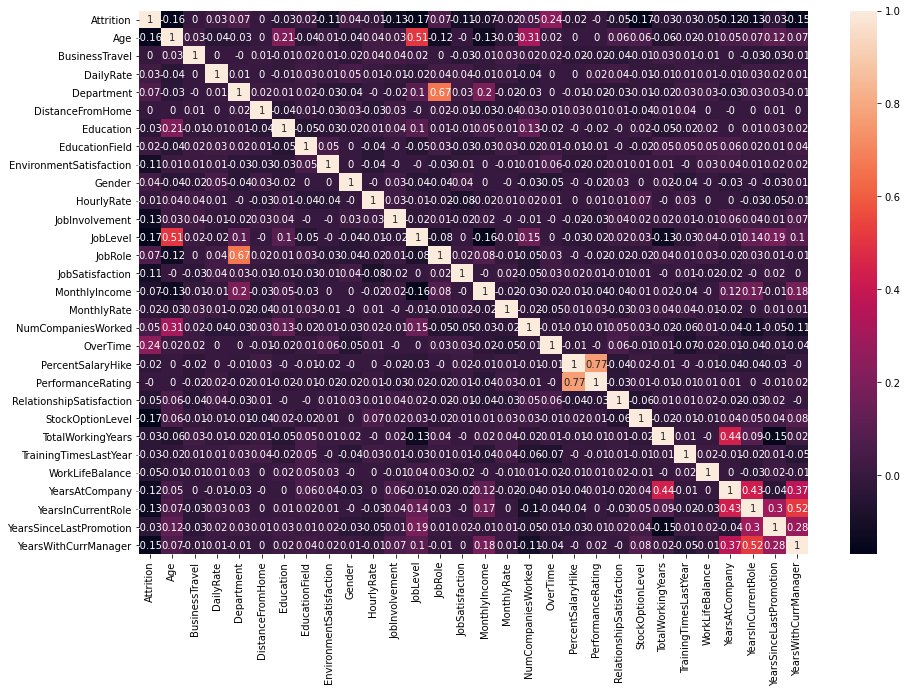

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cor,2),annot=True)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
def calc_vif(ds):
    vif=pd.DataFrame()
    vif["variables"]=ds.columns
    vif["VIF FACTOR"]=[variance_inflation_factor (ds.values,i) for i in range (ds.shape[1])]
    return (vif)


In [43]:
calc_vif(df)

,variables,VIF FACTOR
0,Attrition,1.451504
1,Age,8.199493
2,BusinessTravel,6.597796
3,DailyRate,3.987118
4,Department,13.715591
5,DistanceFromHome,3.015614
6,Education,4.691830
7,EducationField,3.887541
8,EnvironmentSatisfaction,3.473792
9,Gender,2.510556


In [44]:
df.drop("Department",axis=1,inplace=True)

In [45]:
df

,Attrition,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0,31,1,430,27,0,1,2,1,32,...,1,3,1.0,2,1.732051,2,2,16,1,15
2,1,19,2,261,11,1,4,3,1,63,...,0,1,0.0,37,1.732051,2,0,0,0,0
3,0,15,1,277,22,3,1,3,0,27,...,0,2,0.0,38,1.732051,2,35,16,9,0
4,0,9,2,629,11,0,3,0,1,11,...,0,3,1.0,36,1.732051,2,12,11,8,10
5,0,14,1,3,11,1,1,3,1,50,...,0,2,0.0,38,1.414214,1,34,16,9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,0,8,2,104,24,2,4,3,0,1,...,0,3,0.0,35,1.414214,2,30,11,0,0
1465,0,18,1,811,15,1,3,2,1,12,...,0,2,1.0,9,1.732051,2,32,11,0,11
1466,0,21,2,644,25,0,3,3,1,13,...,0,0,1.0,39,2.236068,2,34,16,1,15
1468,0,31,1,11,11,2,3,3,1,34,...,0,3,0.0,9,1.732051,1,36,15,0,16


In [46]:
calc_vif(df)

,variables,VIF FACTOR
0,Attrition,1.430247
1,Age,8.199376
2,BusinessTravel,6.597082
3,DailyRate,3.986560
4,DistanceFromHome,3.013126
5,Education,4.691740
6,EducationField,3.881131
7,EnvironmentSatisfaction,3.471949
8,Gender,2.510509
9,HourlyRate,4.049236


<AxesSubplot:>

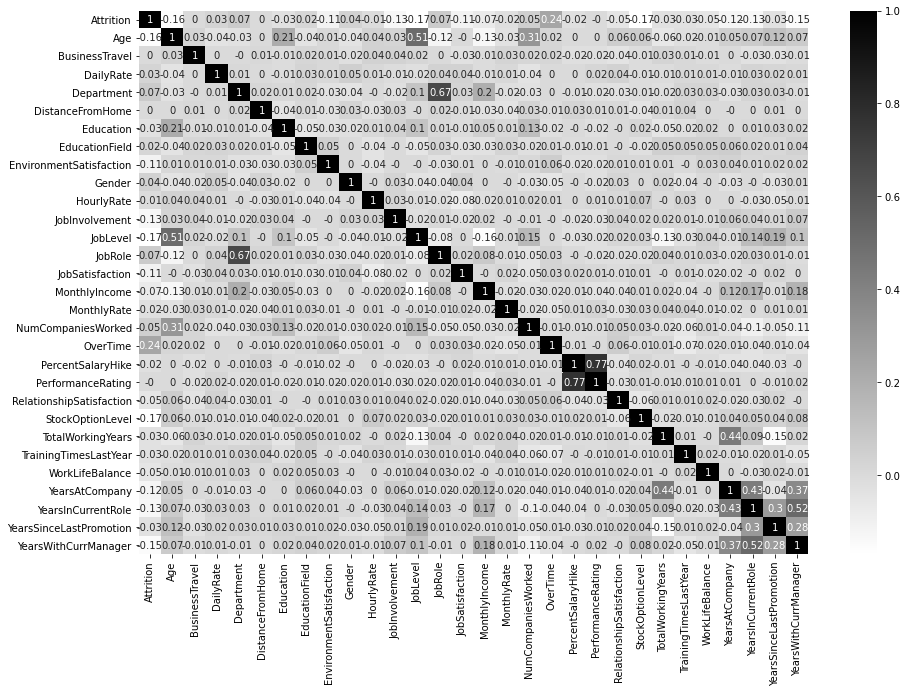

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(round(cor,2),annot=True,cmap="binary")

In [48]:
df.shape

(1416, 29)

In [49]:
# splitting  target 
x=df.drop("Attrition",axis=1)
y=df["Attrition"]


In [50]:
from sklearn.model_selection import train_test_split 

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
#saving best random state 
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)



#note- code running before using PCA 

best accuracy  is  0.84 with random state  143


In [52]:
from sklearn.decomposition import PCA
PCa=PCA(n_components=15)

In [53]:
maxAccuracy=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccuracy:
        maxAccuracy=accu
        maxRS=i

print("best accuracy  is ",maxAccuracy, "with random state ",maxRS)


#note- code running After  using PCA 

best accuracy  is  0.8352941176470589 with random state  144


In [54]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=144)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=86)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

DTC=DecisionTreeRegressor()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc1=classification_report(y_test,pred)
print(acc1)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       361
           1       0.33      0.33      0.33        64

    accuracy                           0.80       425
   macro avg       0.60      0.60      0.60       425
weighted avg       0.80      0.80      0.80       425



### model trials 

In [57]:
from sklearn.naive_bayes import MultinomialNB

MNB=MultinomialNB()
MNB.fit(x_train,y_train)
pred=MNB.predict(x_test)
acc2=classification_report(y_test,pred)
print(acc2)

              precision    recall  f1-score   support

           0       0.88      0.56      0.69       361
           1       0.19      0.56      0.28        64

    accuracy                           0.56       425
   macro avg       0.53      0.56      0.48       425
weighted avg       0.77      0.56      0.62       425



In [58]:
from sklearn.svm import SVC

SVCc=SVC()
SVCc.fit(x_train,y_train)
pred=SVCc.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       361
           1       0.00      0.00      0.00        64

    accuracy                           0.85       425
   macro avg       0.42      0.50      0.46       425
weighted avg       0.72      0.85      0.78       425



In [59]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
acc3=classification_report(y_test,pred)
print(acc3)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       361
           1       0.33      0.12      0.18        64

    accuracy                           0.83       425
   macro avg       0.60      0.54      0.54       425
weighted avg       0.78      0.83      0.80       425



In [60]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [61]:
print ("DTC",cross_val_score(DTC,x,y,cv=5).mean()*100)
print ("KNN",cross_val_score(KNN,x,y,cv=5).mean()*100)
print("SVC",cross_val_score(SVCc,x,y,cv=5).mean()*100)
print ("MNB",cross_val_score(MNB,x,y,cv=5).mean()*100)

DTC -54.65113884199375
KNN 82.13308117254765
SVC 84.32215199323146
MNB 56.35619369929825


In [62]:
models=(DTC,KNN,SVCc,MNB)
for i in models:
    print (i , cross_val_score(i,x,y,cv=7).mean()*100)

DecisionTreeRegressor() -55.25300836851387
KNeighborsClassifier() 81.85282989945722
SVC() 84.32215494596609
MultinomialNB() 56.63665944356575


In [63]:
models=(DTC,KNN,SVCc,MNB)
for i in models:
    print (i , cross_val_score(i,x,y,cv=10).mean()*100)

DecisionTreeRegressor() -54.326023382101255
KNeighborsClassifier() 82.0627309959045
SVC() 84.3222455299171
MultinomialNB() 56.63620017980222


### Using hyper parameter 

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters={"C":np.arange(1.1,5.5),
            "gamma":["scale","auto"],
            "degree":np.arange(1,30),
           "max_iter":np.arange(1,10)}

In [66]:
GCV=GridSearchCV(SVC(),parameters,cv=10)


In [67]:
SVCc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [68]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.1, 2.1, 3.1, 4.1, 5.1]),
                         'degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'gamma': ['scale', 'auto'],
                         'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [69]:
GCV.best_params_

{'C': 1.1, 'degree': 1, 'gamma': 'scale', 'max_iter': 2}

In [70]:
#without parameters 
Test_final_model=SVC(probability=True)
Test_final_model.fit(x_train,y_train)
pred=Test_final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

84.94117647058823


In [71]:
#with parameters 
final_model=SVC(probability=True,C= 1.1, degree= 1, gamma= 'scale', max_iter= 4)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print (acc*100)

45.64705882352941


In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [73]:
pred_y_proba=Test_final_model.predict_proba(x_test)[:,1]
pred_y_proba

array([0.14039826, 0.17539349, 0.20333819, 0.14507676, 0.21904127,
       0.16560856, 0.16403302, 0.08033559, 0.14957771, 0.17772185,
       0.20090258, 0.17042065, 0.1708179 , 0.1764912 , 0.16870475,
       0.11587195, 0.15850374, 0.17325767, 0.14156641, 0.19072697,
       0.16548015, 0.14000436, 0.18883147, 0.08900404, 0.18028748,
       0.10653844, 0.11457973, 0.13767456, 0.2085543 , 0.11525891,
       0.18344336, 0.24599179, 0.09289397, 0.1118435 , 0.19856086,
       0.19918848, 0.13342056, 0.11459525, 0.11449373, 0.13696056,
       0.15031841, 0.1895716 , 0.1782798 , 0.24017884, 0.15463702,
       0.13335593, 0.14196404, 0.15308351, 0.21164926, 0.11884208,
       0.15646106, 0.20527649, 0.11876832, 0.11665453, 0.21313488,
       0.16542824, 0.17731771, 0.14988783, 0.11866578, 0.20697338,
       0.19662354, 0.13565556, 0.25325194, 0.23069283, 0.26166692,
       0.22422849, 0.1999033 , 0.13257489, 0.14095039, 0.1329172 ,
       0.182788  , 0.13013194, 0.12432235, 0.14310383, 0.14660

In [74]:
# constant synax #
fpr,tpr,thresholds=roc_curve(y_test, pred_y_proba)

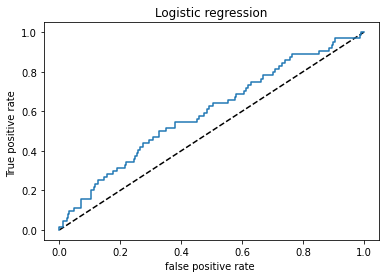

In [75]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr ,tpr,label="Test_final_model")
plt.xlabel("false positive rate ")
plt.ylabel( "True positive rate ")
plt.title( "Logistic regression" )
plt.show()

### saving model 

In [76]:
import joblib
joblib.dump(Test_final_model,"IBM HR.pkl")

['IBM HR.pkl']